In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid', {'axis.edgecolor': '0.2',
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })
%matplotlib inline

In [2]:
def get_num_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumAtoms()

In [3]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [4]:
# df_train = pd.read_csv('gen_model/lipo_cleaned.smi', names=['SMILES'])
df_train = pd.read_csv('pred_models/rf_lipo_preds.csv')
df_train['num_atoms'] = df_train.SMILES.apply(get_num_atoms)
df_train['molecular_weight'] = df_train.SMILES.apply(get_MW)
df_train

,SMILES,split,lipo_true,lipo_pred,num_atoms,molecular_weight
0,COCCNCc1ccc(CCNCC(O)c2ccc(O)c3[nH]c(=O)sc23)cc1,train,-0.54,-0.169700,29,417.531
1,CCCC(CN1CCCC1)N(C)C(=O)Cc1ccc(Cl)c(Cl)c1,train,2.27,2.305028,23,357.325
2,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,train,3.59,3.564750,37,513.989
3,O=C1Nc2ccc(S(=O)(=O)N3CCCC3CNc3ccccc3)cc2C1=O,train,2.40,2.453015,27,385.445
4,N#Cc1cnn2c(N)cc(-c3cccs3)nc12,train,2.30,2.263371,17,241.279
...,...,...,...,...,...,...
4092,COc1cc2ncnc(Oc3cnn(CC(=O)Nc4ccc(N(C)C)cn4)c3)c...,test,2.36,2.649242,33,449.471
4093,O=C(NC(Cc1ccc(N2CCN(c3ccccc3)CC2)cc1)C(=O)O)c1...,test,0.08,1.075967,34,498.410
4094,CCNC(=O)Nc1nc2cc(-c3cccnc3)ccc2[nH]1,test,2.34,2.677532,21,281.319
4095,N#Cc1c(-c2ccc(-c3ccccc3OC(F)(F)F)cc2)nc2ccncc2c1O,test,3.45,3.044362,30,407.351


In [5]:
df_gen = pd.read_csv('gen_model/generated_smiles_agent1.csv')
df_gen['num_atoms'] = df_gen.SMILES.apply(get_num_atoms)
df_gen['molecular_weight'] = df_gen.SMILES.apply(get_MW)
df_gen

,SMILES,inchi_key,rf_lipo,num_atoms,molecular_weight
0,COc1ccc(-c2ccccc2F)cc1-c1ccc(F)cc1,AAOWWLHFYBTFRJ-UHFFFAOYSA-N,3.372484,22,296.316
1,CCCCCCC1=C(c2ccccc2Oc2ccccc2)C=CC(c2cnccc2-c2c...,AAOXLIKJSPRDBR-UHFFFAOYSA-N,3.412306,56,726.964
2,CCCCC1=C(c2ccccc2F)N(c2ccccc2)c2ccccc2-c2ccccc21,AARKZAOJPTTWOW-UHFFFAOYSA-N,3.293765,32,419.543
3,CC(CCCCCCCc1ccc(F)cc1)c1ccc(-c2ccccc2OCC(=O)Nc...,ABMPOTCTCTYGPX-UHFFFAOYSA-N,3.239068,41,549.690
4,FC(F)(c1ccc(Cl)c(-c2ccccc2)c1)c1ccccc1Cl,ABNQUDPMUWSIBZ-UHFFFAOYSA-N,3.312928,23,349.207
...,...,...,...,...,...
2053,Cc1ccc(CCc2ccccc2-c2ccccc2F)c(-c2ccccc2CCCc2cc...,ZZCOVKLARSYDJW-UHFFFAOYSA-N,3.428818,37,484.658
2054,COc1ccc(Nc2ccccc2C(=O)c2ccccc2N)cc1,ZZHBKVRCNBPEJB-UHFFFAOYSA-N,3.135522,24,318.376
2055,CCCCCc1c(-c2ccccc2Oc2ccccc2)ccc(-c2ccccc2F)c1-...,ZZHUZGMSNQDUSM-UHFFFAOYSA-N,3.651879,37,486.630
2056,CCCCCCCCc1c(Nc2ccccc2F)oc2ccc(F)cc12,ZZQSGUYATPWFTB-UHFFFAOYSA-N,3.573094,26,357.444


In [6]:
sns.set_style('darkgrid', {'axis.edgecolor': 'black',
                           'axes.linewidth': 2,
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })

Visually confirm that the biasing worked i.e., the generated molecules should be drawn from a distribution that has a higher logD than the training set. The molecular weight distribution is relatively unchanged


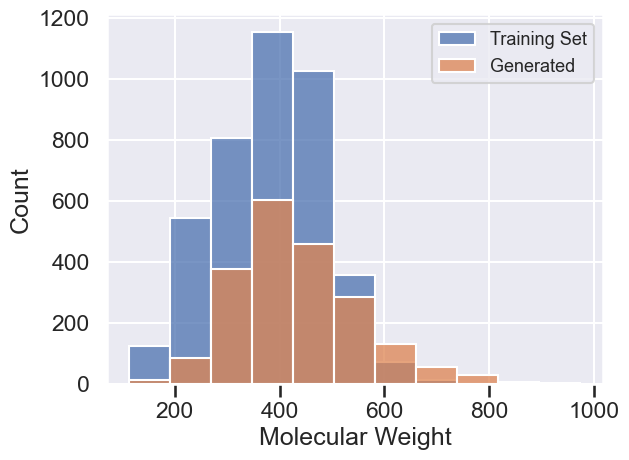

In [7]:
target = 'molecular_weight'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

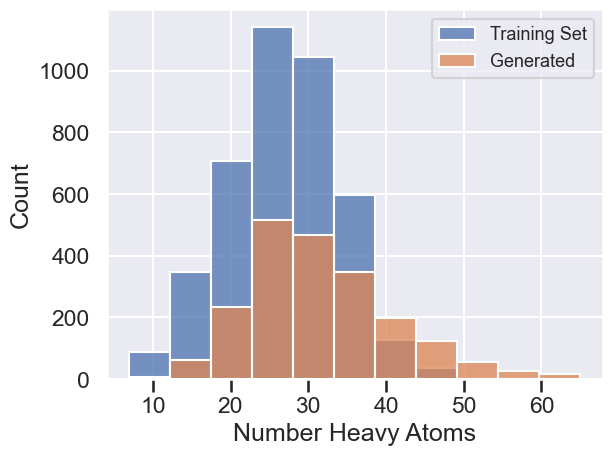

In [8]:
target = 'num_atoms'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Number Heavy Atoms')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

Numerically, the mean logD for the biased generator is 3.328 +- 0.288 vs. 2.129 +- 0.851 for the training set. MW went up a bit.

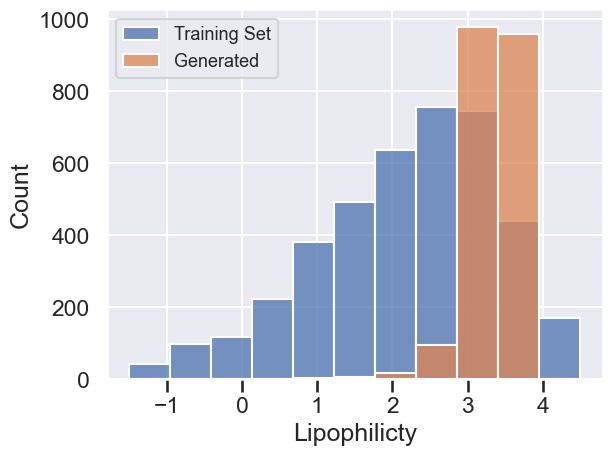

In [9]:
bins = np.histogram_bin_edges(df_train['lipo_true'], bins=11)
ax = sns.histplot(x=df_train['lipo_true'], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen['rf_lipo'], bins=bins, label='Generated')

ax.set_xlabel('Lipophilicty')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

In [10]:
df_train.describe()

,lipo_true,lipo_pred,num_atoms,molecular_weight
count,4097.000000,4097.000000,4097.000000,4097.000000
mean,2.196087,2.199289,26.995607,382.520615
std,1.199093,0.996588,7.233378,103.760856
min,-1.500000,-1.107900,7.000000,113.160000
25%,1.440000,1.598890,22.000000,306.369000
50%,2.370000,2.350489,27.000000,388.383000
75%,3.100000,2.971376,32.000000,456.912000
max,4.500000,4.364222,65.000000,974.634000


In [11]:
df_gen.describe()

,rf_lipo,num_atoms,molecular_weight
count,2058.000000,2058.000000,2058.000000
mean,3.328428,31.813897,434.912817
std,0.287891,9.423172,122.033794
min,0.768762,8.000000,129.109000
25%,3.254904,26.000000,352.464500
50%,3.396713,30.000000,417.465500
75%,3.486758,37.000000,505.010750
max,3.784033,82.000000,1049.370000
